Alberto Geroldi 968236
# <span style="color:green">Numerical simulation laboratory (NSL)</span>

# Exercise 2

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math

In [2]:
def error(AV,AV2,n):
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

In [3]:
def blocks(data_file):
    sum1 = 0.
    sum2 = 0.
    y_val = np.zeros((len(data_file), 2))
    for ix in range(len(data_file)):
        sum1 += data_file[ix]
        sum2 += data_file[ix] * data_file[ix]
        AV = sum1 / (ix + 1)
        AV2 = sum2 / (ix + 1)
        y_val[ix,0] = AV
        y_val[ix,1] = error(AV,AV2,ix)
    return y_val

## EX 2.1

We estimate the value of the integral  
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$  
via Monte Carlo method sampling from two different distributions:  
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)


In [4]:
with open("data/N_data_2_1.txt") as file:
    N_blocks = int(file.readline())
    N_throws = int(file.readline())
print(f"N_blocks = {N_blocks}")
print(f"N_throws = {N_throws}")

#data
uniform = np.loadtxt("data/2_1_uniform.txt")
importance = np.loadtxt("data/2_1_importance.txt")


N_blocks = 100
N_throws = 10000


# 2.1.1 Sampling a uniform distribution in $[0,1]$

We use the mean value of $g(x_i)$ to estimate the integral  
$g(x) = \frac{\pi}{2}\cos(\frac{\pi}{2}x)$  
$p(x) = 1$

Mean:

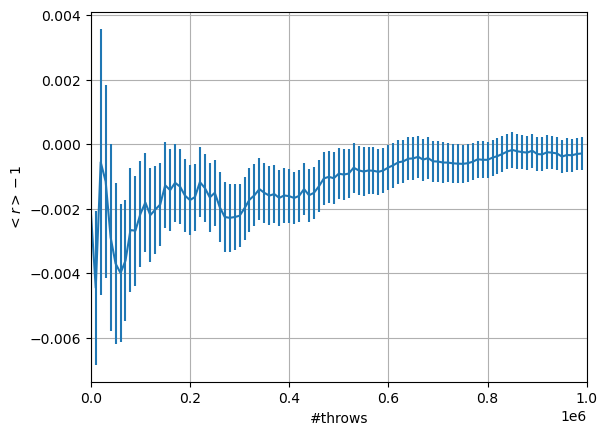

<r> - 1 = -0.0003 ± 0.0005


In [5]:
x = np.arange(N_blocks) * N_throws
y = blocks(uniform[:,0])
plt.errorbar(x,y[:,0]-1, yerr=y[:,1])
plt.xlim(0, 1e6)
plt.xlabel(r"#throws")
plt.ylabel(r"$<r> - 1$")
plt.grid(True)
plt.show()
print(f"<r> - 1 = {y[-1, 0]-1:.4f} ± {y[-1, 1]:.4f}")


Variance:

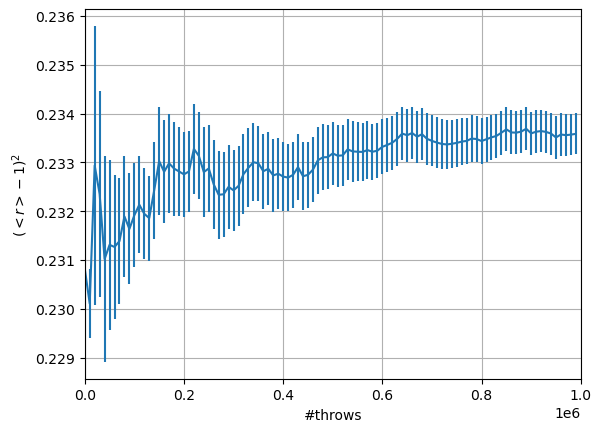

(<r> - 1)^2 = 0.2336 ± 0.0004


In [6]:
x = np.arange(N_blocks) * N_throws
y = blocks(uniform[:,1])
plt.errorbar(x,y[:,0], yerr=y[:,1])
plt.xlim(0, 1e6)
plt.xlabel(r"#throws")
plt.ylabel(r"$(<r> - 1)^2$")
plt.grid(True)
plt.show()
print(f"(<r> - 1)^2 = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")


# 2.1.2 Importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

To reduce the variance, we'll use a probability distribution more similar to the $g(x)$ via Taylor expansion.  
We first expand in x = 0:  
$$\frac{\pi}{2}\left(1 - \frac{\pi^2}{8} x^2\right)$$
but in the integration interval function changes in sign ($d(x)$ equals to zero for some values).

Then we expand in x = 1:  
$$\frac{\pi^2}{4}\left(1 - x\right)$$
It is always positive in the interval $[0,1]$

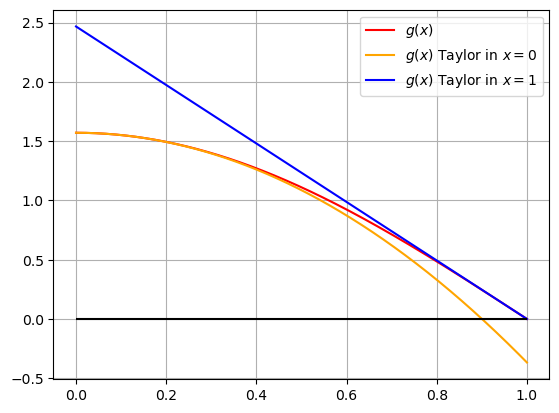

In [7]:
x = np.linspace(0, 1, 1000)
g = np.pi/2 * np.cos(np.pi/2 * x)
g1 = np.pi/2 * (1 - np.pi*np.pi/8 * x*x)
g2 = np.pi/2 * np.pi/2 * (1 - x)

plt.grid()
plt.plot(x, g, label="$g(x)$", color="red")
plt.plot(x, g1, label="$g(x)$ Taylor in $x=0$", color="orange")
plt.plot(x, g2, label="$g(x)$ Taylor in $x=1$", color="blue")
plt.hlines(0, 0, 1, color="black")
plt.legend()
plt.show()

With the importance sampling we use:   
$$I = \int_0^1 g(x)p(x)dx$$
with 

$p(x) = \frac{8}{\pi^2}\frac{\pi^2}{4}\left(1-x\right) = 2\left(1-x\right)$  

and  

$g(x) = \frac{\pi}{2}\cos(\frac{\pi}{2}x) \frac{1}{2(1-x)}$

Mean:

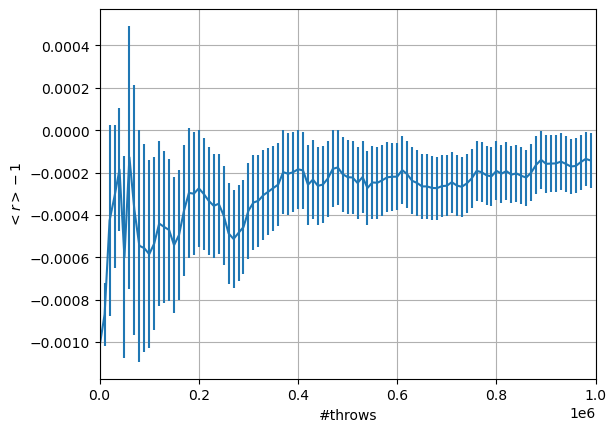

<r> - 1 = -0.0001 ± 0.0001


In [8]:
x = np.arange(N_blocks) * N_throws
y = blocks(importance[:,0])
plt.errorbar(x,y[:,0]-1, yerr=y[:,1])
plt.xlim(0, 1e6)
plt.xlabel(r"#throws")
plt.ylabel(r"$<r> - 1$")
plt.grid(True)
plt.show()
print(f"<r> - 1 = {y[-1, 0]-1:.4f} ± {y[-1, 1]:.4f}")

Variance:

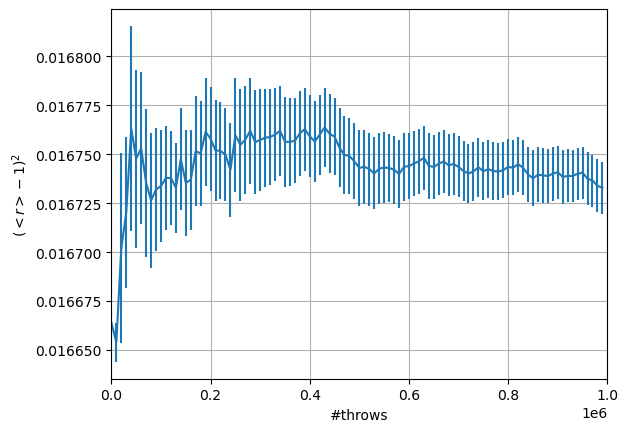

(<r> - 1)^2 = 0.01673 ± 0.00001


In [9]:
x = np.arange(N_blocks) * N_throws
y = blocks(importance[:,1])
plt.errorbar(x,y[:,0], yerr=y[:,1])
plt.xlim(0, 1e6)
plt.xlabel(r"#throws")
plt.ylabel(r"$(<r> - 1)^2$")
plt.grid(True)
plt.show()
print(f"(<r> - 1)^2 = {y[-1, 0]:.5f} ± {y[-1, 1]:.5f}")


<div class="alert alert-success">With importance sampling we have variance 10 times smaller respect to the previous choice of the probability distribution</div>

## EX 2.2

3D random walks:  
1. on a cubic lattice with lattice constant $a=1$;  
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$  

Since the lattice constant is equal to 1 and the discrete step is $\tau=1$, then:
$$\langle x(t)^2 \rangle = 2Dt = 2 \frac{a^2}{2\tau}t = \frac{a^2}{\tau} n\tau = n$$  

$\sqrt{\langle x(t)^2 \rangle} = \sqrt{n}$ is the expected distance of the walker from the origin, with $n$ the number of steps in the random walk.(diffusive behavior)

In [10]:
with open("data/N_data_2_2.txt") as file:
    N_blocks = int(file.readline())
    N_throws = int(file.readline())
    N_steps = int(file.readline())
print(f"N_blocks = {N_blocks}")
print(f"N_throws = {N_throws}")
print(f"N_steps = {N_steps}")

#data
discreteRW = np.loadtxt("data/2_2_discreteRW.txt")
continuumRW = np.loadtxt("data/2_2_continuumRW.txt")

N_blocks = 100
N_throws = 10000
N_steps = 100


# 2.2.1 Cubic lattice

We simulate a random walk on a cubic lattice (discrete case). The walker moves forward or backward with equal probability in one of the three directions (x,y,z).  
The three directions are drawn from a uniform probability distribution.

In [11]:
discrete = []
for i in range(N_steps):
    discrete.append(blocks(discreteRW[:, i]))
discrete_rw = np.array(discrete)

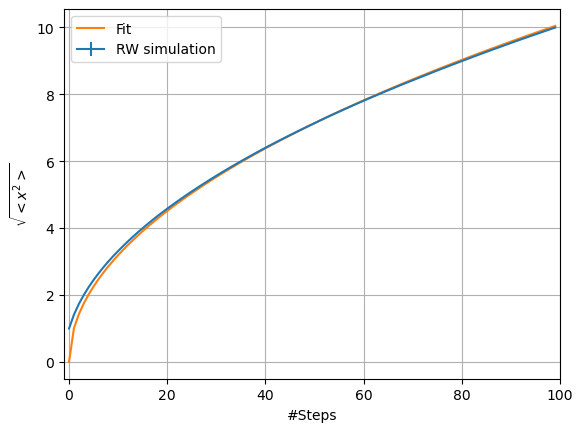

K best fit: (1.00952 ± 0.00185)


In [12]:
x = np.arange(N_steps)
plt.grid()
plt.errorbar(x, discrete_rw[:, -1, 0], yerr=discrete_rw[:, -1, 1], label="RW simulation")
#fit the result of simulation with function: f(N) = k * sqrt(N)
f_n = lambda x,k: k * np.sqrt(x)
#popt: Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized
#pcov: The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. 
###### To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).
popt, pcov = curve_fit(f_n, x, discrete_rw[:, -1, 0])
k = popt[0]
perr = np.sqrt(pcov[0,0])
plt.plot(x, f_n(x, k), label="Fit")
plt.xlim(-1,100)
plt.xlabel("#Steps")
plt.ylabel("$\\sqrt{<x^2>}$")
plt.legend()
plt.show()

print(f"K best fit: ({k:.5f} ± {perr:.5f})")

We can see a diffusive behavior, the simulated RW is in agreement with the fitted function

Now we take the last step (N_steps = 100) to evalute the difference between the simulated value and the expected value.

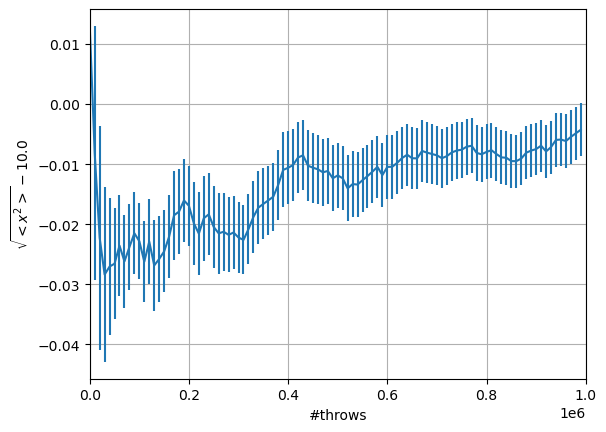

sqrt(<x^2>)-10.0 = -0.0043 ± 0.0044


In [13]:
x = np.arange(N_blocks) * N_throws
expected_val = np.sqrt(N_steps)
plt.errorbar(x, discrete_rw[-1, :, 0] - expected_val, yerr=discrete_rw[-1, :, 1])
plt.xlim(0,1e6)
plt.xlabel(r"#throws")
plt.ylabel(r"$\sqrt{<x^2>}-" f"{expected_val}" r"$")
plt.grid(True)
plt.show()
print(f"sqrt(<x^2>)-{expected_val} = {discrete_rw[-1, -1, 0]-expected_val:.4f} ± {discrete_rw[-1, -1, 1]:.4f}")

# 2.2.2 Continuum RW

We simulate a RW in the continuum. At each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle.

In [14]:
continuum = []
for i in range(N_steps):
    continuum.append(blocks(continuumRW[:, i]))
continuum_rw = np.array(continuum)

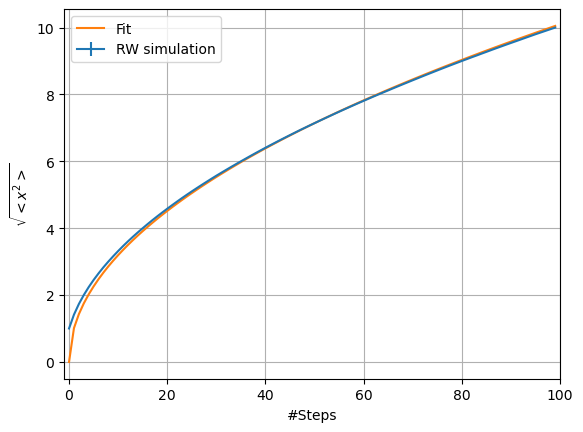

K best fit: (1.00987 ± 0.00184)


In [15]:
x = np.arange(N_steps)
plt.grid()
plt.errorbar(x, continuum_rw[:, -1, 0], yerr=continuum_rw[:, -1, 1], label="RW simulation")
#fit the result of simulation with function: f(N) = k * sqrt(N)
f_n = lambda x,k: k * np.sqrt(x)
#popt: Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized
#pcov: The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. 
###### To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).
popt, pcov = curve_fit(f_n, x, continuum_rw[:, -1, 0])
k = popt[0]
perr = np.sqrt(pcov[0,0])
plt.plot(x, f_n(x, k), label="Fit")
plt.xlim(-1,100)
plt.xlabel("#Steps")
plt.ylabel("$\\sqrt{<x^2>}$")
plt.legend()
plt.show()

print(f"K best fit: ({k:.5f} ± {perr:.5f})")

We can see a diffusive behavior, the simulated RW is in agreement with the fitted function

Now we take the last step (N_steps = 100) to evalute the difference between the simulated value and the expected value.

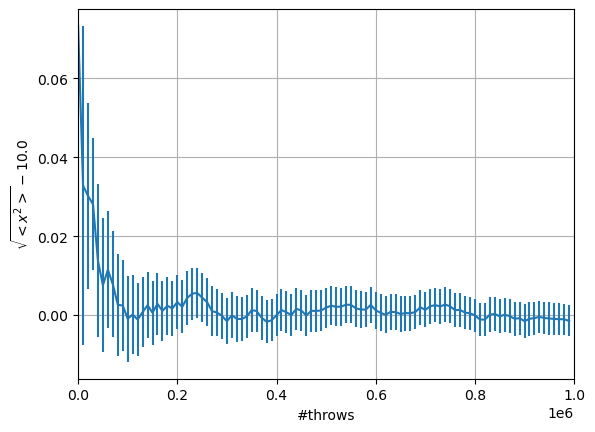

sqrt(<x^2>)-10.0 = -0.0015 ± 0.0039


In [16]:
x = np.arange(N_blocks) * N_throws
expected_val = np.sqrt(N_steps)
plt.errorbar(x, continuum_rw[-1, :, 0] - expected_val, yerr=continuum_rw[-1, :, 1])
plt.xlim(0,1e6)
plt.xlabel(r"#throws")
plt.ylabel(r"$\sqrt{<x^2>}-" f"{expected_val}" r"$")
plt.grid(True)
plt.show()
print(f"sqrt(<x^2>)-{expected_val} = {continuum_rw[-1, -1, 0]-expected_val:.4f} ± {continuum_rw[-1, -1, 1]:.4f}")